# k-EN YAKIN KOMŞU (k-NN) ALGORİTMASI

## Giriş
k-En Yakın Komşu (k-NN) algoritması, hem sınıflandırma hem de regresyon problemlerinde kullanılabilen, denetimli öğrenmeye dayalı bir makine öğrenmesi algoritmasıdır. Bu algoritma, bir veri noktasının k komşusunun sınıflandırma etiketlerine bakarak tahmin yapar.

**Algoritmanın Temel Adımları:**
1. K komşu sayısını (k) belirleyin.
2. Sınıflandırılacak yeni veri noktasını eğitim verilerine göre konumlandırın.
3. Eğitim verileri arasından yeni veri noktasına en yakın k komşuyu bulun.
4. k komşunun etiketlerini kontrol edin ve en sık görülen etiketi yeni veri noktasına atayın (sınıflandırma).
5. Regresyon durumunda ise, k komşunun etiketlerinin ortalamasını alın.

**Avantajları:**
- Basit ve anlaşılır bir algoritmadır.
- Parametrik olmayan bir yöntemdir, yani veri dağılımına dair varsayımlar yapmaz.

**Dezavantajları:**
- Büyük veri kümelerinde hesaplama maliyeti yüksek olabilir.
- Özelliklerin ölçeklendirilmesi gereklidir, aksi halde yüksek değerli özellikler algoritmayı yanıltabilir.


## Gerekli Kütüphanelerin Yüklenmesi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Veri Setinin Yüklenmesi ve Hazırlanması
Iris veri setini kullanacağız. Bu veri seti, çiçeklerin taç yaprağı ve çanak yaprağı uzunluklarına göre türlerini sınıflandırmamıza olanak tanır.

In [2]:
# Veri setini yükleyin
iris = load_iris()
X = iris.data
y = iris.target

# Veri hakkında bilgi
print("Özellik İsimleri: ", iris.feature_names)
print("Sınıf İsimleri: ", iris.target_names)
print("\nVeri Örnekleri:\n", X[:5])
print("\nSınıf Örnekleri:\n", y[:5])

Özellik İsimleri:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Sınıf İsimleri:  ['setosa' 'versicolor' 'virginica']

Veri Örnekleri:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Sınıf Örnekleri:
 [0 0 0 0 0]


Veriyi eğitim ve test olarak ayırın

In [3]:
# Veriyi eğitim ve test olarak ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri ölçeklendirin
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## k-NN Algoritmasının Uygulanması
k=3 için k-NN modelini oluşturacağız ve test verisi üzerinde doğruluğunu ölçeceğiz.

In [4]:
# k-NN modelini oluşturun
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapın
y_pred = knn.predict(X_test)

# Modelin doğruluğunu hesaplayın
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Doğruluğu: {accuracy}")

# Sınıflandırma raporu ve karışıklık matrisi
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

print("\nKarışıklık Matrisi:")
print(confusion_matrix(y_test, y_pred))


Model Doğruluğu: 1.0

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Karışıklık Matrisi:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Model Performansını Değerlendirme
Doğruluk, k-NN algoritmasının performansını değerlendirmek için kullanılan yaygın bir metriktir. Ayrıca karışıklık matrisi ve sınıflandırma raporu, modelin hangi sınıflarda daha iyi veya kötü performans gösterdiğini anlamamıza yardımcı olur.

## En İyi k Değerinin Belirlenmesi
Farklı k değerleri için model performansını karşılaştırarak en iyi k değerini belirleyebiliriz.

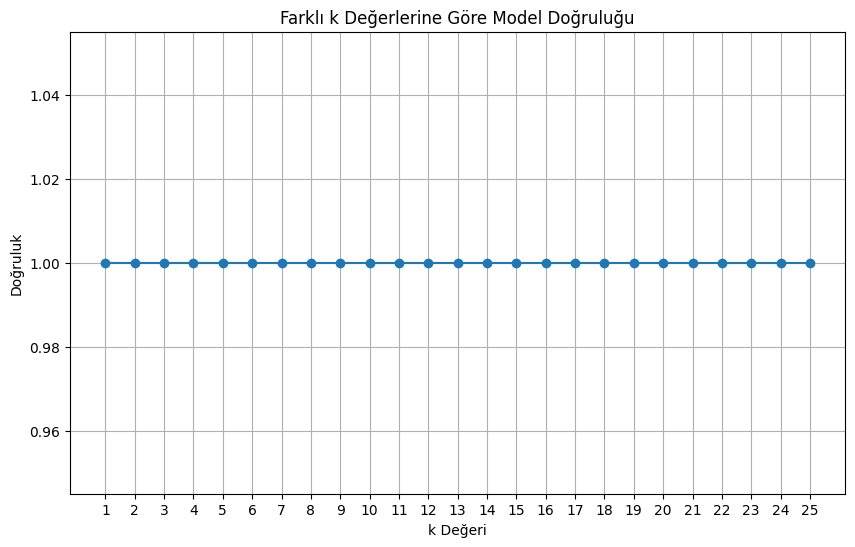

In [5]:
# Farklı k değerlerini deneme
k_values = range(1, 26)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Performansı görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Farklı k Değerlerine Göre Model Doğruluğu')
plt.xlabel('k Değeri')
plt.ylabel('Doğruluk')
plt.xticks(k_values)
plt.grid()
plt.show()

## Sonuç
Bu notebook'ta k-NN algoritmasının temel prensiplerini ve Iris veri seti üzerinde nasıl uygulandığını öğrendik. Ayrıca farklı k değerleri için model performansını karşılaştırarak en iyi k değerini belirledik. k-NN algoritması, basitliği ve sezgisel doğası ile birçok uygulamada başarılı sonuçlar verebilir. Ancak, özelliklerin ölçeklendirilmesi ve uygun k değerinin seçimi gibi önemli hususlara dikkat edilmelidir.